# 01_keras

In [1]:
#pip install tensorflow

In [2]:
%cd ai-science-training-series/03_neural_networks_tensorflow/

/home/wendadeng/ai-science-training-series/My Homework/ai-science-training-series/03_neural_networks_tensorflow


In [3]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

2022-11-12 20:19:34.029482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 20:19:35.983337: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-12 20:19:38.534969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lus/theta-fs0/software/thetagpu/openmpi-4.0.5/ucx-1.9.0rc7/lib:/lus/theta-fs0/software/thetagpu/openmpi-4.0.5/lib
2022-11-12 20:19:38.535343: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('CIFAR-10 data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step

CIFAR-10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000, 1)


### Download the dataset and load

In [5]:
!pip install image-dataset-loader
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!tar -xf cifar10.tgz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.4 MB 35.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
--2022-11-12 20:20:00--  https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.56.248
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.56.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135107811 (129M) [application/x-tar]
Saving to: ‘cifar10.tgz’

cifar10.tgz         100%[===================>] 128.85M  41.8MB/s    in 3.1s    

2022-11-12 20:20:04 (41.8 MB/s) - ‘cifar10.tgz’ saved [135107811/135107811]



In [6]:
from image_dataset_loader import load
(x_train, y_train), (x_test, y_test) = load('cifar10', ['train', 'test'])

x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

print()
print('CIFAR-10 data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)


CIFAR-10 data loaded: train: 50000 test: 10000
X_train: (50000, 32, 32, 3)
y_train: (50000,)


In [7]:
class LinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(10, activation='softmax')


    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)

        return x

In [8]:
linear_model = LinearClassifier()

linear_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

2022-11-12 20:21:35.996321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-12 20:21:36.943713: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38406 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


In [9]:
%%time
# This took about a third of a second per epoch on my laptop
batch_size = 512
epochs = 30
history = linear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30


2022-11-12 20:21:39.220132: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


98/98 - 2s - loss: 2.1377 - accuracy: 0.2159 - 2s/epoch - 16ms/step
Epoch 2/30
98/98 - 0s - loss: 1.9885 - accuracy: 0.2946 - 181ms/epoch - 2ms/step
Epoch 3/30
98/98 - 0s - loss: 1.9334 - accuracy: 0.3257 - 183ms/epoch - 2ms/step
Epoch 4/30
98/98 - 0s - loss: 1.9009 - accuracy: 0.3397 - 183ms/epoch - 2ms/step
Epoch 5/30
98/98 - 0s - loss: 1.8797 - accuracy: 0.3465 - 182ms/epoch - 2ms/step
Epoch 6/30
98/98 - 0s - loss: 1.8625 - accuracy: 0.3543 - 185ms/epoch - 2ms/step
Epoch 7/30
98/98 - 0s - loss: 1.8503 - accuracy: 0.3596 - 190ms/epoch - 2ms/step
Epoch 8/30
98/98 - 0s - loss: 1.8394 - accuracy: 0.3624 - 189ms/epoch - 2ms/step
Epoch 9/30
98/98 - 0s - loss: 1.8308 - accuracy: 0.3662 - 188ms/epoch - 2ms/step
Epoch 10/30
98/98 - 0s - loss: 1.8240 - accuracy: 0.3691 - 189ms/epoch - 2ms/step
Epoch 11/30
98/98 - 0s - loss: 1.8167 - accuracy: 0.3718 - 189ms/epoch - 2ms/step
Epoch 12/30
98/98 - 0s - loss: 1.8107 - accuracy: 0.3749 - 188ms/epoch - 2ms/step
Epoch 13/30
98/98 - 0s - loss: 1.8058 

In [10]:
print(linear_model.summary())

Model: "linear_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
None


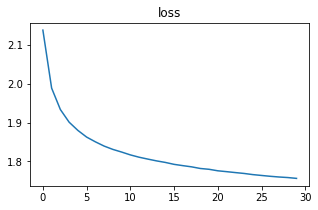

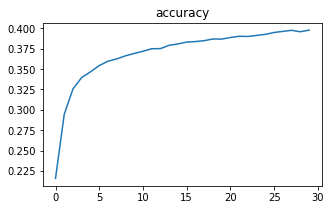

In [11]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

For a better measure of the quality of the model, let's see the model accuracy for the test data. 

In [12]:
linscores = linear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (linear_model.metrics_names[1], linscores[1]*100))

313/313 - 0s - loss: 1.7773 - accuracy: 0.3835 - 383ms/epoch - 1ms/step
accuracy: 38.35%


In [13]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=20):
    rounded = numpy.argmax(predictions, axis=1)
    errors = rounded!=y_test.flatten()
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(x_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and rounded[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(x_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

313/313 [==============================] - 0s 703us/step
Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


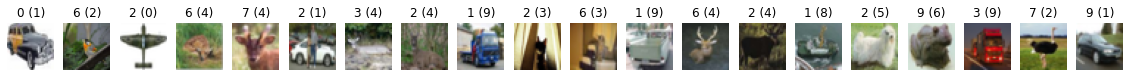

In [14]:
linpredictions = linear_model.predict(x_test)

show_failures(linpredictions)

## Multi-layer perceptron (MLP) network

### Initialization

Let's now create a more complex MLP model that has multiple layers, non-linear activation functions, and dropout layers. 

`Dropout()` randomly sets a fraction of inputs to zero during training, which is one approach to regularization and can sometimes help to prevent overfitting. 

There are two options below, a simple and a bit more complex model.  Select either one.

The output of the last layer needs to be a softmaxed 10-dimensional vector to match the groundtruth (`y_train`). 

In [15]:
class NonlinearClassifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.layer_1 = tf.keras.layers.Dense(50, activation='relu')
        
        # A bit more complex model: (need to uncomment in call fn as well)
        self.layer_2 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_3 = tf.keras.layers.Dropout(0.2)
        self.layer_4 = tf.keras.layers.Dense(50, activation='relu')
        self.drop_5 = tf.keras.layers.Dropout(0.2)
        
        # The last layer needs to be like this:
        self.layer_out = tf.keras.layers.Dense(10, activation='softmax')


    def call(self, inputs):

        x = tf.keras.layers.Flatten()(inputs)
        x = self.layer_1(x)
        
        # The more complex version:
        x = self.layer_2(x)
        x = self.drop_3(x)
        x = self.layer_4(x)
        x = self.drop_5(x)
        
        x = self.layer_out(x)

        return x

Finally, we again `compile()` the model, this time using [*SGD*](https://keras.io/optimizers/#rmsprop) as the optimizer.

In [16]:
nonlinear_model = NonlinearClassifier()

nonlinear_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

### Learning

In [17]:
%%time
# This took around a third of a second per epoch on my laptop for the simpler version, 
# and around 1 second per epoch for the more complex one.
batch_size = 512
epochs = 30
history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/30
98/98 - 1s - loss: 2.3005 - accuracy: 0.1229 - 641ms/epoch - 7ms/step
Epoch 2/30
98/98 - 0s - loss: 2.2623 - accuracy: 0.1560 - 214ms/epoch - 2ms/step
Epoch 3/30
98/98 - 0s - loss: 2.2203 - accuracy: 0.1808 - 213ms/epoch - 2ms/step
Epoch 4/30
98/98 - 0s - loss: 2.1759 - accuracy: 0.1990 - 212ms/epoch - 2ms/step
Epoch 5/30
98/98 - 0s - loss: 2.1360 - accuracy: 0.2110 - 212ms/epoch - 2ms/step
Epoch 6/30
98/98 - 0s - loss: 2.1005 - accuracy: 0.2256 - 212ms/epoch - 2ms/step
Epoch 7/30
98/98 - 0s - loss: 2.0681 - accuracy: 0.2347 - 214ms/epoch - 2ms/step
Epoch 8/30
98/98 - 0s - loss: 2.0446 - accuracy: 0.2447 - 214ms/epoch - 2ms/step
Epoch 9/30
98/98 - 0s - loss: 2.0200 - accuracy: 0.2556 - 215ms/epoch - 2ms/step
Epoch 10/30
98/98 - 0s - loss: 1.9996 - accuracy: 0.2632 - 215ms/epoch - 2ms/step
Epoch 11/30
98/98 - 0s - loss: 1.9847 - accuracy: 0.2711 - 219ms/epoch - 2ms/step
Epoch 12/30
98/98 - 0s - loss: 1.9659 - accuracy: 0.2760 - 222ms/epoch - 2ms/step
Epoch 13/30
98/98 - 0s - 

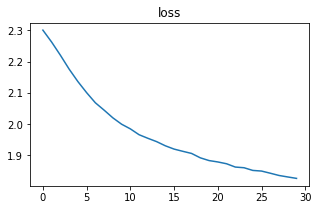

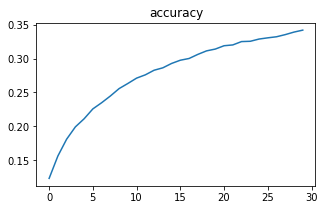

In [18]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

Accuracy for test data.  The model should be better than the linear model. 

In [19]:
%%time
scores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], scores[1]*100))

313/313 - 0s - loss: 1.7484 - accuracy: 0.3808 - 407ms/epoch - 1ms/step
accuracy: 38.08%
CPU times: user 629 ms, sys: 130 ms, total: 759 ms
Wall time: 527 ms


313/313 [==============================] - 0s 790us/step
Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


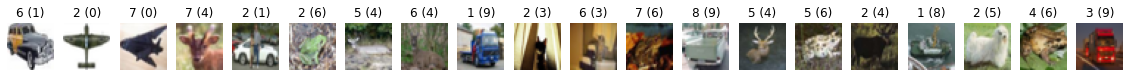

In [20]:
predictions = nonlinear_model.predict(x_test)

show_failures(predictions)

Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


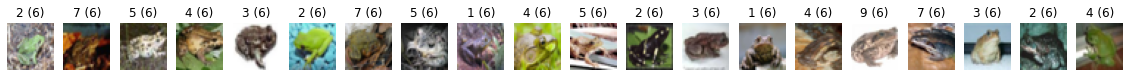

In [21]:
show_failures(predictions, trueclass=6)

In [22]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

[[476  40  61  23  10  43  30  78 195  44]
 [ 53 449  28  34  11  57  45  45 143 135]
 [124  27 205  29 174 126 174  95  33  13]
 [ 33  54  89 105  44 354 168  80  33  40]
 [ 56  21 161  20 269 107 187 130  33  16]
 [ 22  29  91  68  72 433 145  82  46  12]
 [  6  34  95  54 102 141 510  33  10  15]
 [ 40  42  71  40 110  96  66 454  26  55]
 [159  95  27  12   1  76  12  24 534  60]
 [ 72 211  21  23   6  33  52  68 141 373]]

Classification accuracy for each class:

0: 0.4760
1: 0.4490
2: 0.2050
3: 0.1050
4: 0.2690
5: 0.4330
6: 0.5100
7: 0.4540
8: 0.5340
9: 0.3730


# In-class exercise: improve the accuracy of this model

How can you improve model accuracy by increasing epochs, stacking more layers, or changing the optimizer?

In [23]:
%%time
# This took around a third of a second per epoch on my laptop for the simpler version, 
# and around 1 second per epoch for the more complex one.
batch_size = 256
epochs = 50
history = nonlinear_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/50
196/196 - 0s - loss: 1.8250 - accuracy: 0.3420 - 333ms/epoch - 2ms/step
Epoch 2/50
196/196 - 0s - loss: 1.8126 - accuracy: 0.3501 - 331ms/epoch - 2ms/step
Epoch 3/50
196/196 - 0s - loss: 1.8039 - accuracy: 0.3506 - 329ms/epoch - 2ms/step
Epoch 4/50
196/196 - 0s - loss: 1.7975 - accuracy: 0.3488 - 338ms/epoch - 2ms/step
Epoch 5/50
196/196 - 0s - loss: 1.7900 - accuracy: 0.3544 - 330ms/epoch - 2ms/step
Epoch 6/50
196/196 - 0s - loss: 1.7829 - accuracy: 0.3588 - 326ms/epoch - 2ms/step
Epoch 7/50
196/196 - 0s - loss: 1.7762 - accuracy: 0.3602 - 328ms/epoch - 2ms/step
Epoch 8/50
196/196 - 0s - loss: 1.7727 - accuracy: 0.3622 - 331ms/epoch - 2ms/step
Epoch 9/50
196/196 - 0s - loss: 1.7624 - accuracy: 0.3671 - 338ms/epoch - 2ms/step
Epoch 10/50
196/196 - 0s - loss: 1.7555 - accuracy: 0.3713 - 327ms/epoch - 2ms/step
Epoch 11/50
196/196 - 0s - loss: 1.7520 - accuracy: 0.3736 - 326ms/epoch - 2ms/step
Epoch 12/50
196/196 - 0s - loss: 1.7461 - accuracy: 0.3749 - 337ms/epoch - 2ms/step
E

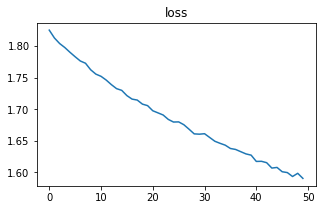

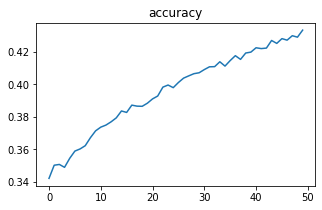

In [24]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

Accuracy for test data.  The model should be better than the linear model. 

In [25]:
%%time
scores = nonlinear_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (nonlinear_model.metrics_names[1], scores[1]*100))

313/313 - 0s - loss: 1.6054 - accuracy: 0.4224 - 333ms/epoch - 1ms/step
accuracy: 42.24%
CPU times: user 592 ms, sys: 103 ms, total: 695 ms
Wall time: 454 ms


313/313 [==============================] - 0s 823us/step
Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


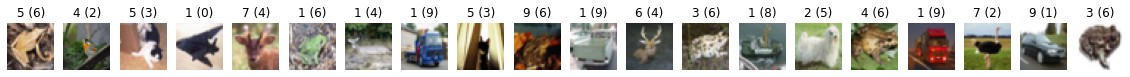

In [26]:
predictions = nonlinear_model.predict(x_test)

show_failures(predictions)

Showing max 20 first failures. The predicted class is shown first and the correct class in parenthesis.


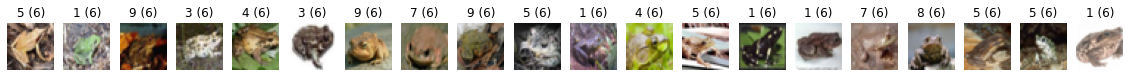

In [27]:
show_failures(predictions, trueclass=6)

In [28]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

[[575 125  15  22  11  18  10  48 120  56]
 [ 36 753   3  12   2  26  10  22  36 100]
 [158  84 115  84 165 130  71 131  33  29]
 [ 68 129  33 190  18 318  55  96  33  60]
 [ 93  75  71  44 285 106  74 205  27  20]
 [ 43  89  48 138  32 417  32 134  34  33]
 [ 11 108  33 142 133 113 345  74  18  23]
 [ 52  86  21  44  20  81   8 590  11  87]
 [157 192   2  10   1  33   4  12 523  66]
 [ 31 408   1  20   1  13  14  40  41 431]]

Classification accuracy for each class:

0: 0.5750
1: 0.7530
2: 0.1150
3: 0.1900
4: 0.2850
5: 0.4170
6: 0.3450
7: 0.5900
8: 0.5230
9: 0.4310


By using batch size = 256 and epochs = 50, the accuracy increased from 38.08% to 42.24% and classification accuracies for each class now have better result

# 02_keras_cnn

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

In [30]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)

        return x

### Simple training

Here is a concise way to train the network, like we did in the previous notebook. We'll see a more verbose approach below that allows more performance tuning.

In [31]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [32]:
# This took 43 seconds per epoch on my laptop
batch_size = 512
epochs = 3
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/3


2022-11-12 20:35:23.355702: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


98/98 [==============================] - 3s 8ms/step - loss: 1.9093 - accuracy: 0.3051
Epoch 2/3
98/98 [==============================] - 1s 7ms/step - loss: 1.5595 - accuracy: 0.4333
Epoch 3/3
98/98 [==============================] - 1s 7ms/step - loss: 1.4249 - accuracy: 0.4862


Accuracy for test data.  The model should be better than the non-convolutional model even if you're only patient enough for three epochs. 

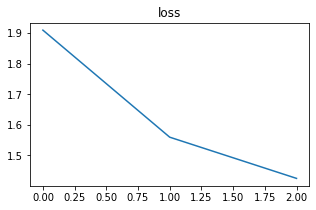

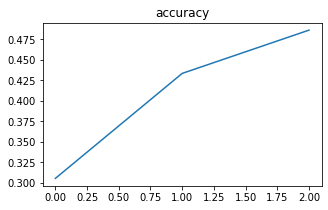

In [33]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

With enough training epochs, the test accuracy should exceed 96.53%.

You can compare your result with the state-of-the art [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). 

In [34]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 0s - loss: 1.2590 - accuracy: 0.5524 - 489ms/epoch - 2ms/step
accuracy: 55.24%
CPU times: user 803 ms, sys: 1.17 s, total: 1.98 s
Wall time: 1.7 s


We can also again check the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

313/313 [==============================] - 0s 958us/step
[[514  37  38  28  41  17  46  39 139 101]
 [  9 687   1  11   6   7  44  19  22 194]
 [ 59  15 148  49 280 148 190  74  15  22]
 [  7  16  18 273  94 215 252  79   6  40]
 [ 23   7  14  48 505  48 236 101  12   6]
 [  6   5  16 109 108 533  94 111   5  13]
 [  1   4  10  30  54  13 861  13   1  13]
 [  4   5   6  37  78  98  50 687   2  33]
 [ 81 101   9  17  10  23  39  17 607  96]
 [ 13 126   3  13   6   8  60  39  23 709]]

Classification accuracy for each class:

0: 0.5140
1: 0.6870
2: 0.1480
3: 0.2730
4: 0.5050
5: 0.5330
6: 0.8610
7: 0.6870
8: 0.6070
9: 0.7090


### More verbose training

This approach explicitly handles the looping over data. It will be helpful in future weeks for diving in and optimizing

In [36]:
def compute_loss(y_true, y_pred):
    # if labels are integers, use sparse categorical crossentropy
    # network's final layer is softmax, so from_logtis=False
    scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # if labels are one-hot encoded, use standard crossentropy

    return scce(y_true, y_pred)  

In [37]:
def forward_pass(model, batch_data, y_true):
    y_pred = model(batch_data)
    loss = compute_loss(y_true, y_pred)
    return loss

In [38]:
# Here is a function that will manage the training loop for us:

def train_loop(batch_size, n_training_epochs, model, opt):
    
    @tf.function()
    def train_iteration(data, y_true, model, opt):
        with tf.GradientTape() as tape:
            loss = forward_pass(model, data, y_true)

        trainable_vars = model.trainable_variables

        # Apply the update to the network (one at a time):
        grads = tape.gradient(loss, trainable_vars)

        opt.apply_gradients(zip(grads, trainable_vars))
        return loss

    for i_epoch in range(n_training_epochs):
        print("beginning epoch %d" % i_epoch)
        start = time.time()

        epoch_steps = int(50000/batch_size)
        dataset.shuffle(50000) # Shuffle the whole dataset in memory
        batches = dataset.batch(batch_size=batch_size, drop_remainder=True)
        
        for i_batch, (batch_data, y_true) in enumerate(batches):
            batch_data = tf.reshape(batch_data, [-1, 32, 32, 3])
            loss = train_iteration(batch_data, y_true, model, opt)
            
        end = time.time()
        print("took %1.1f seconds for epoch #%d" % (end-start, i_epoch))

In [39]:
def train_network(_batch_size, _n_training_epochs, _lr):

    cifar_model = CIFAR10Classifier()

    opt = tf.keras.optimizers.Adam(_lr)

    train_loop(_batch_size, _n_training_epochs, cifar_model, opt)

In [40]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset.shuffle(50000)

batch_size = 512
epochs = 3
lr = .01
train_network(batch_size, epochs, lr)

beginning epoch 0
took 1.2 seconds for epoch #0
beginning epoch 1
took 0.9 seconds for epoch #1
beginning epoch 2
took 0.9 seconds for epoch #2


# Homework: improve the accuracy of this model

Update this notebook to ensure more accuracy. How high can it be raised? Changes like increasing the number of epochs, altering the learning rate, altering the number of neurons the hidden layer, chnaging the optimizer, etc. could be made directly in the notebook. You can also change the model specification by expanding the network's layer. The current notebook's training accuracy is roughly 58.06%, although it varies randomly.

In [41]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_2 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.2)
        self.conv_5 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_6 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_7 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_8 = tf.keras.layers.Dropout(0.2)
        self.conv_9 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.conv_10 = tf.keras.layers.Conv2D(128, [3, 3], activation='relu', kernel_initializer='he_uniform', padding='same')
        self.pool_11 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_12 = tf.keras.layers.Dropout(0.2)
        self.dense_13 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_14 = tf.keras.layers.Dropout(0.2)
        self.dense_15 = tf.keras.layers.Dense(10, activation='softmax')
        

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        
        x = self.conv_5(x)
        x = self.conv_6(x)
        x = self.pool_7(x)
        x = self.drop_8(x)
        
        
        x = self.conv_9(x)
        x = self.conv_10(x)
        x = self.pool_11(x)
        x = self.drop_12(x)
        
        
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_13(x)
        x = self.drop_14(x)
        x = self.dense_15(x)

        return x

In [42]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [43]:
batch_size = 64
epochs = 10
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 1.6382 - accuracy: 0.3966
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.1747 - accuracy: 0.5830
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.9779 - accuracy: 0.6559
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.8635 - accuracy: 0.6998
Epoch 5/10
782/782 [==============================] - 3s 3ms/step - loss: 0.7722 - accuracy: 0.7317
Epoch 6/10
782/782 [==============================] - 3s 3ms/step - loss: 0.7148 - accuracy: 0.7504
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6540 - accuracy: 0.7709
Epoch 8/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6117 - accuracy: 0.7865
Epoch 9/10
782/782 [==============================] - 3s 3ms/step - loss: 0.5745 - accuracy: 0.7978
Epoch 10/10
782/782 [==============================] - 3s 3ms/step - loss: 0.5443 - accuracy: 0.8088

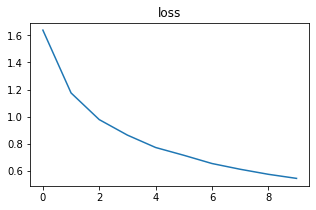

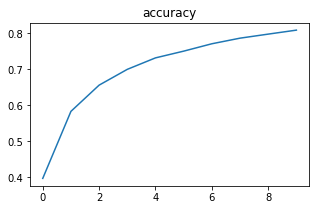

In [44]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [45]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 1s - loss: 0.6100 - accuracy: 0.7959 - 645ms/epoch - 2ms/step
accuracy: 79.59%
CPU times: user 972 ms, sys: 1.18 s, total: 2.15 s
Wall time: 1.89 s


The classificatio accuracy increased from 55.24% to 79.59%